### k-means

K-means is an **unsupervised** clustering algorithm. It is an iterative optimization process that calculates the centroids (cluster centers) that minimize a certain metric (usually the Euclidean distance). In this notebook, we are going to implement a simple version of k-means to quantize a grayscale image.

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
img = cv2.imread('data/kodim15.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img/255

Implementation of k-means iterations.

In [3]:
num_clusters = 4                          # Number of clusters
centroids = np.random.rand(num_clusters)  # Initialize the centroids (e.g. randomly)
centroids = np.array([0, 0.1, 0.2, 0.3])

history = [np.copy(centroids)]
for iteration in range(0, 30):
    # Cluster the pixels (i.e. for each pixel find the closest centroid)
    # We are taking advantage of python broadcasting here
    diff = np.abs(img[..., np.newaxis] - centroids[np.newaxis, np.newaxis, ...])
    indices = np.argmin(diff, axis=-1)

    # After pixel clustering, recompute the centroids
    for ii in range(num_clusters):
        centroids[ii] = np.mean(img[indices == ii])    
    
    # Check if centroids have hit the convergence
    change = np.sum(np.abs(np.array(history[-1]) - centroids))
    if change == 0:
        print('Convergence hit at iteration ', iteration)
        break
        
    # Update history (just for plotting purposes)
    history.append(np.copy(centroids))
        

Convergence hit at iteration  24


We plot the history to visualize the evolution of centroid updates.

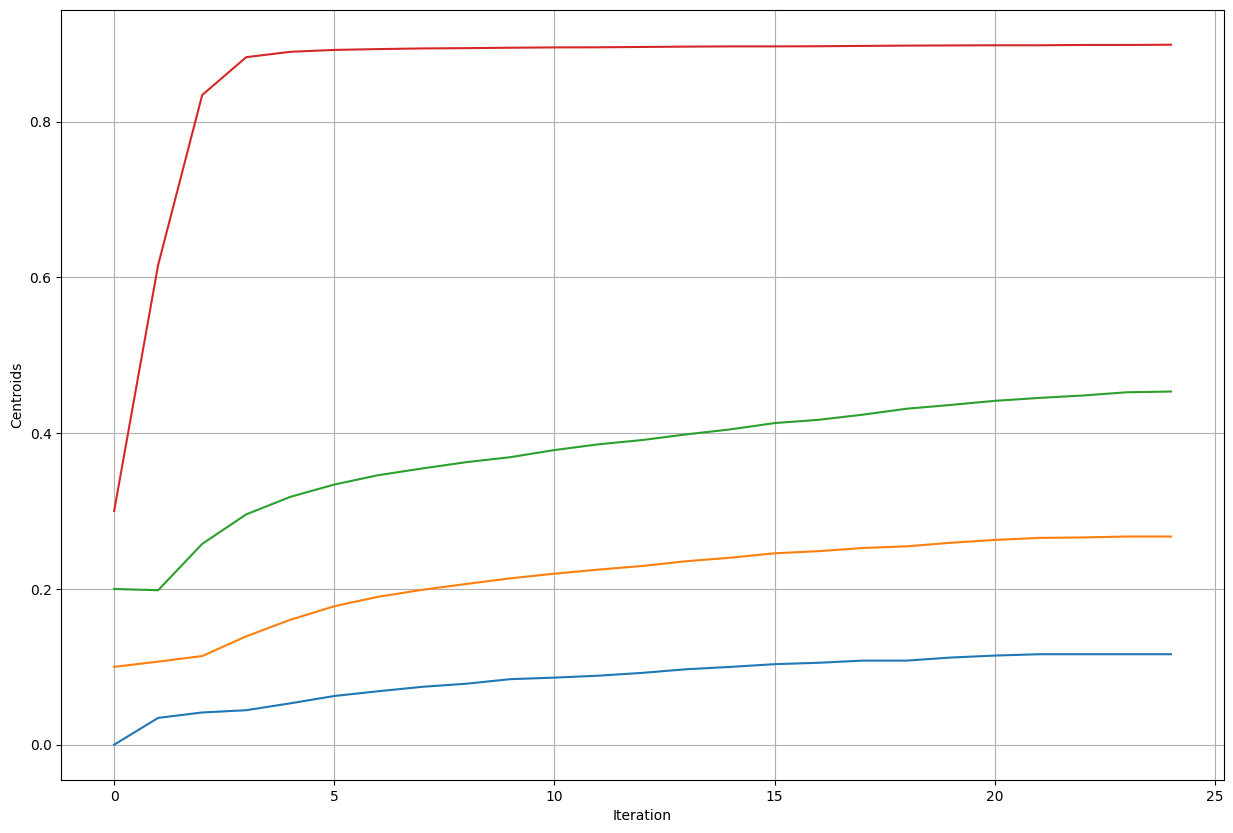

In [4]:
plt.plot(np.array(history))
plt.xlabel('Iteration')
plt.ylabel('Centroids')
plt.grid(True)

### Quantization

After finding the centroids, i.e., the best fitting pallette of colours, we quantize the original image to the given palette.

In [5]:
rows, cols = img.shape
result = np.zeros_like(img)

for r in range(rows):
    for c in range(cols):
        color_idx = np.argmin(np.abs(img[r,c] - centroids))
        result[r, c] = centroids[color_idx]

(<Axes: >, <matplotlib.image.AxesImage at 0x13c5701d0>)

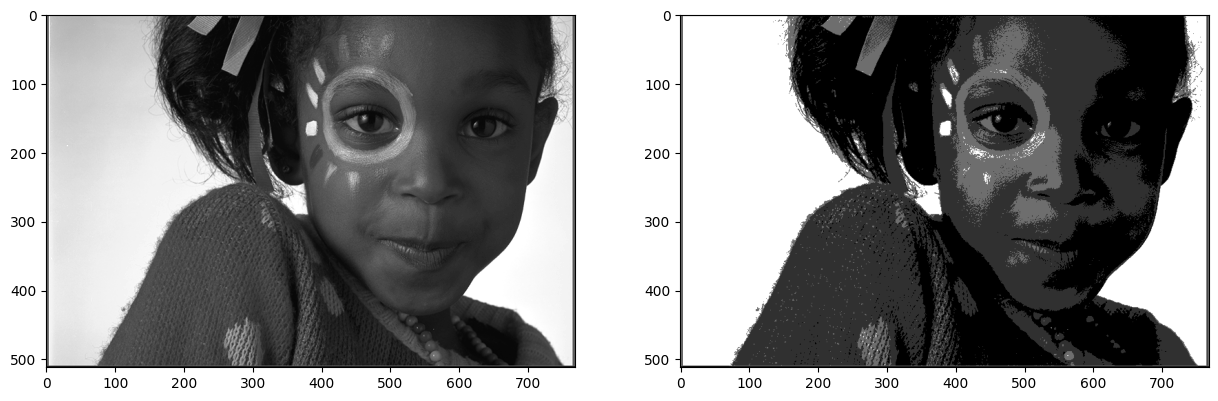

In [6]:
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(result, cmap='gray')